In [132]:
## import the data manipulation and visualization libraries 

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

## Dataset Characteristics 

In [4]:
df = pd.read_csv('msk_impact_2017_clinical_data.tsv', sep = '\t' )

In [5]:
## first 5top rows from the dataframe
df.head()
len(df['Patient ID'].unique())

10336

In [6]:
## columns data types summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       10945 non-null  object 
 1   Patient ID                     10945 non-null  object 
 2   Sample ID                      10945 non-null  object 
 3   Cancer Type                    10945 non-null  object 
 4   Cancer Type Detailed           10945 non-null  object 
 5   DNA Input                      10945 non-null  float64
 6   Fraction Genome Altered        10939 non-null  float64
 7   Matched Status                 10945 non-null  object 
 8   Metastatic Site                4779 non-null   object 
 9   Mutation Count                 10945 non-null  int64  
 10  Oncotree Code                  10945 non-null  object 
 11  Overall Survival (Months)      8142 non-null   float64
 12  Overall Survival Status        10943 non-null 

In [7]:
## statistical discription of the numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DNA Input,10945.0,238.598098,36.335811,50.0,250.0000,250.0000,250.0000,250.0
Fraction Genome Altered,10939.0,0.194683,0.189345,0.0,0.0355,0.1449,0.2962,1.0
Mutation Count,10945.0,7.126176,16.809472,0.0,2.0000,4.0000,7.0000,455.0
Overall Survival (Months),8142.0,12.456394,7.765755,0.0,6.5400,11.1400,17.3500,40.4
Number of Samples Per Patient,10945.0,1.120786,0.371490,1.0,1.0000,1.0000,1.0000,5.0
Sample coverage,10945.0,717.547190,267.344696,48.0,538.0000,726.0000,895.0000,2778.0
Tumor Purity,10475.0,45.610597,22.283762,10.0,30.0000,40.0000,60.0000,100.0


In [8]:
# description of categorical features
df[df.select_dtypes(include = 'object').columns].astype('category').describe().T

,count,unique,top,freq
Study ID,10945,1,msk_impact_2017,10945
Patient ID,10945,10336,P-0000377,5
Sample ID,10945,10945,P-0000004-T01-IM3,1
Cancer Type,10945,59,Non-Small Cell Lung Cancer,1668
Cancer Type Detailed,10945,359,Lung Adenocarcinoma,1357
Matched Status,10945,2,Matched,10703
Metastatic Site,4779,150,Liver,1083
Oncotree Code,10945,370,LUAD,1357
Overall Survival Status,10943,2,0:LIVING,7830
Primary Tumor Site,10917,157,Lung,1779


In [9]:
# check the dataset features
print(df.columns)
print(df.shape)

Index(['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type',
       'Cancer Type Detailed', 'DNA Input', 'Fraction Genome Altered',
       'Matched Status', 'Metastatic Site', 'Mutation Count', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status',
       'Primary Tumor Site', 'Sample Class', 'Sample Collection Source',
       'Number of Samples Per Patient', 'Sample coverage', 'Sample Type',
       'Sex', 'Smoking History', 'Somatic Status',
       'Specimen Preservation Type', 'Specimen Type', 'Tumor Purity',
       'Patient's Vital Status'],
      dtype='object')
(10945, 26)


## Data Cleansing

### 1- Droping unrelated features

In [10]:
# dropping unrelated and duplicated features
df.drop(labels = ['Study ID', 'Sample ID','Matched Status','Number of Samples Per Patient',
                    'Sample Class', 'Sample Collection Source', 'Sample coverage', 'Somatic Status',
                    'Specimen Preservation Type', 'Specimen Type', 'Sample Type', 'Overall Survival Status',
                    'Overall Survival (Months)'] , axis = 1, inplace = True)

In [11]:
df.head()

,Patient ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Metastatic Site,Mutation Count,Oncotree Code,Primary Tumor Site,Sex,Smoking History,Tumor Purity,Patient's Vital Status
0,P-0000004,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,NaN,16,IDC,Breast,Female,Unknown,50.0,ALIVE
1,P-0000015,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Liver,7,IDC,Breast,Female,Never,40.0,DECEASED
2,P-0000023,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,NaN,5,PEMESO,Peritoneum,Male,Never,30.0,DECEASED
3,P-0000024,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Lung,6,UEC,Uterus,Female,Prev/Curr Smoker,40.0,ALIVE
4,P-0000025,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,NaN,1,USC,Uterus,Female,Never,NaN,ALIVE


### 2- Dealing with null and duplication

In [12]:
df.isnull().sum()

Patient ID                    0
Cancer Type                   0
Cancer Type Detailed          0
DNA Input                     0
Fraction Genome Altered       6
Metastatic Site            6166
Mutation Count                0
Oncotree Code                 0
Primary Tumor Site           28
Sex                           0
Smoking History               2
Tumor Purity                470
Patient's Vital Status        2
dtype: int64

In [13]:
# drop observations where Tumor Purity  is null
df.drop(df[df['Tumor Purity'].isnull()].index, inplace = True)
df[df['Tumor Purity'].isnull()]

,Patient ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Metastatic Site,Mutation Count,Oncotree Code,Primary Tumor Site,Sex,Smoking History,Tumor Purity,Patient's Vital Status


In [14]:
# reccheck null values in each column
df.isna().sum()

Patient ID                    0
Cancer Type                   0
Cancer Type Detailed          0
DNA Input                     0
Fraction Genome Altered       4
Metastatic Site            5924
Mutation Count                0
Oncotree Code                 0
Primary Tumor Site           28
Sex                           0
Smoking History               2
Tumor Purity                  0
Patient's Vital Status        2
dtype: int64

In [15]:
# drop observations where the target value is null
df.drop(df[df['Patient\'s Vital Status'].isnull()].index, inplace = True)
df[df['Patient\'s Vital Status'].isnull()]

,Patient ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Metastatic Site,Mutation Count,Oncotree Code,Primary Tumor Site,Sex,Smoking History,Tumor Purity,Patient's Vital Status


In [16]:
# drop observations where Fraction Genome Altered is null
df.drop(df[df['Fraction Genome Altered'].isnull()].index, inplace = True)
df[df['Fraction Genome Altered'].isnull()]

,Patient ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Metastatic Site,Mutation Count,Oncotree Code,Primary Tumor Site,Sex,Smoking History,Tumor Purity,Patient's Vital Status


In [17]:
# drop observations where Primary Tumor Site  is null
df.drop(df[df['Primary Tumor Site'].isnull()].index, inplace = True)
df[df['Primary Tumor Site'].isnull()]

,Patient ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Metastatic Site,Mutation Count,Oncotree Code,Primary Tumor Site,Sex,Smoking History,Tumor Purity,Patient's Vital Status


In [18]:
# reccheck null values in each column
df.isna().sum()

Patient ID                    0
Cancer Type                   0
Cancer Type Detailed          0
DNA Input                     0
Fraction Genome Altered       0
Metastatic Site            5893
Mutation Count                0
Oncotree Code                 0
Primary Tumor Site            0
Sex                           0
Smoking History               0
Tumor Purity                  0
Patient's Vital Status        0
dtype: int64

In [19]:
# replace null values in Metastatic Site column with Unknown
df['Metastatic Site'].fillna(value = 'Unknown', inplace = True)
df[df['Metastatic Site'].isnull()]

,Patient ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Metastatic Site,Mutation Count,Oncotree Code,Primary Tumor Site,Sex,Smoking History,Tumor Purity,Patient's Vital Status


In [20]:
# reccheck null values in each column
df.isna().sum()

Patient ID                 0
Cancer Type                0
Cancer Type Detailed       0
DNA Input                  0
Fraction Genome Altered    0
Metastatic Site            0
Mutation Count             0
Oncotree Code              0
Primary Tumor Site         0
Sex                        0
Smoking History            0
Tumor Purity               0
Patient's Vital Status     0
dtype: int64

In [21]:
# check for duplication
df.duplicated().sum()

4

In [22]:
# drop duplicated observations
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

## Exploratory Data Analysis

In [23]:
#dataset shape after cleansing
df.shape

(10437, 13)

In [153]:
## get the number of the unique patients
len(df['Patient ID'].unique())

9890

In [25]:
# select the top 7 cancer types
ls = ['Non-Small Cell Lung Cancer', 'Breast Cancer', 'Colorectal Cancer',
       'Prostate Cancer', 'Glioma', 'Pancreatic Cancer',
       'Soft Tissue Sarcoma']
mini_df = df[df['Cancer Type'].isin(ls)]

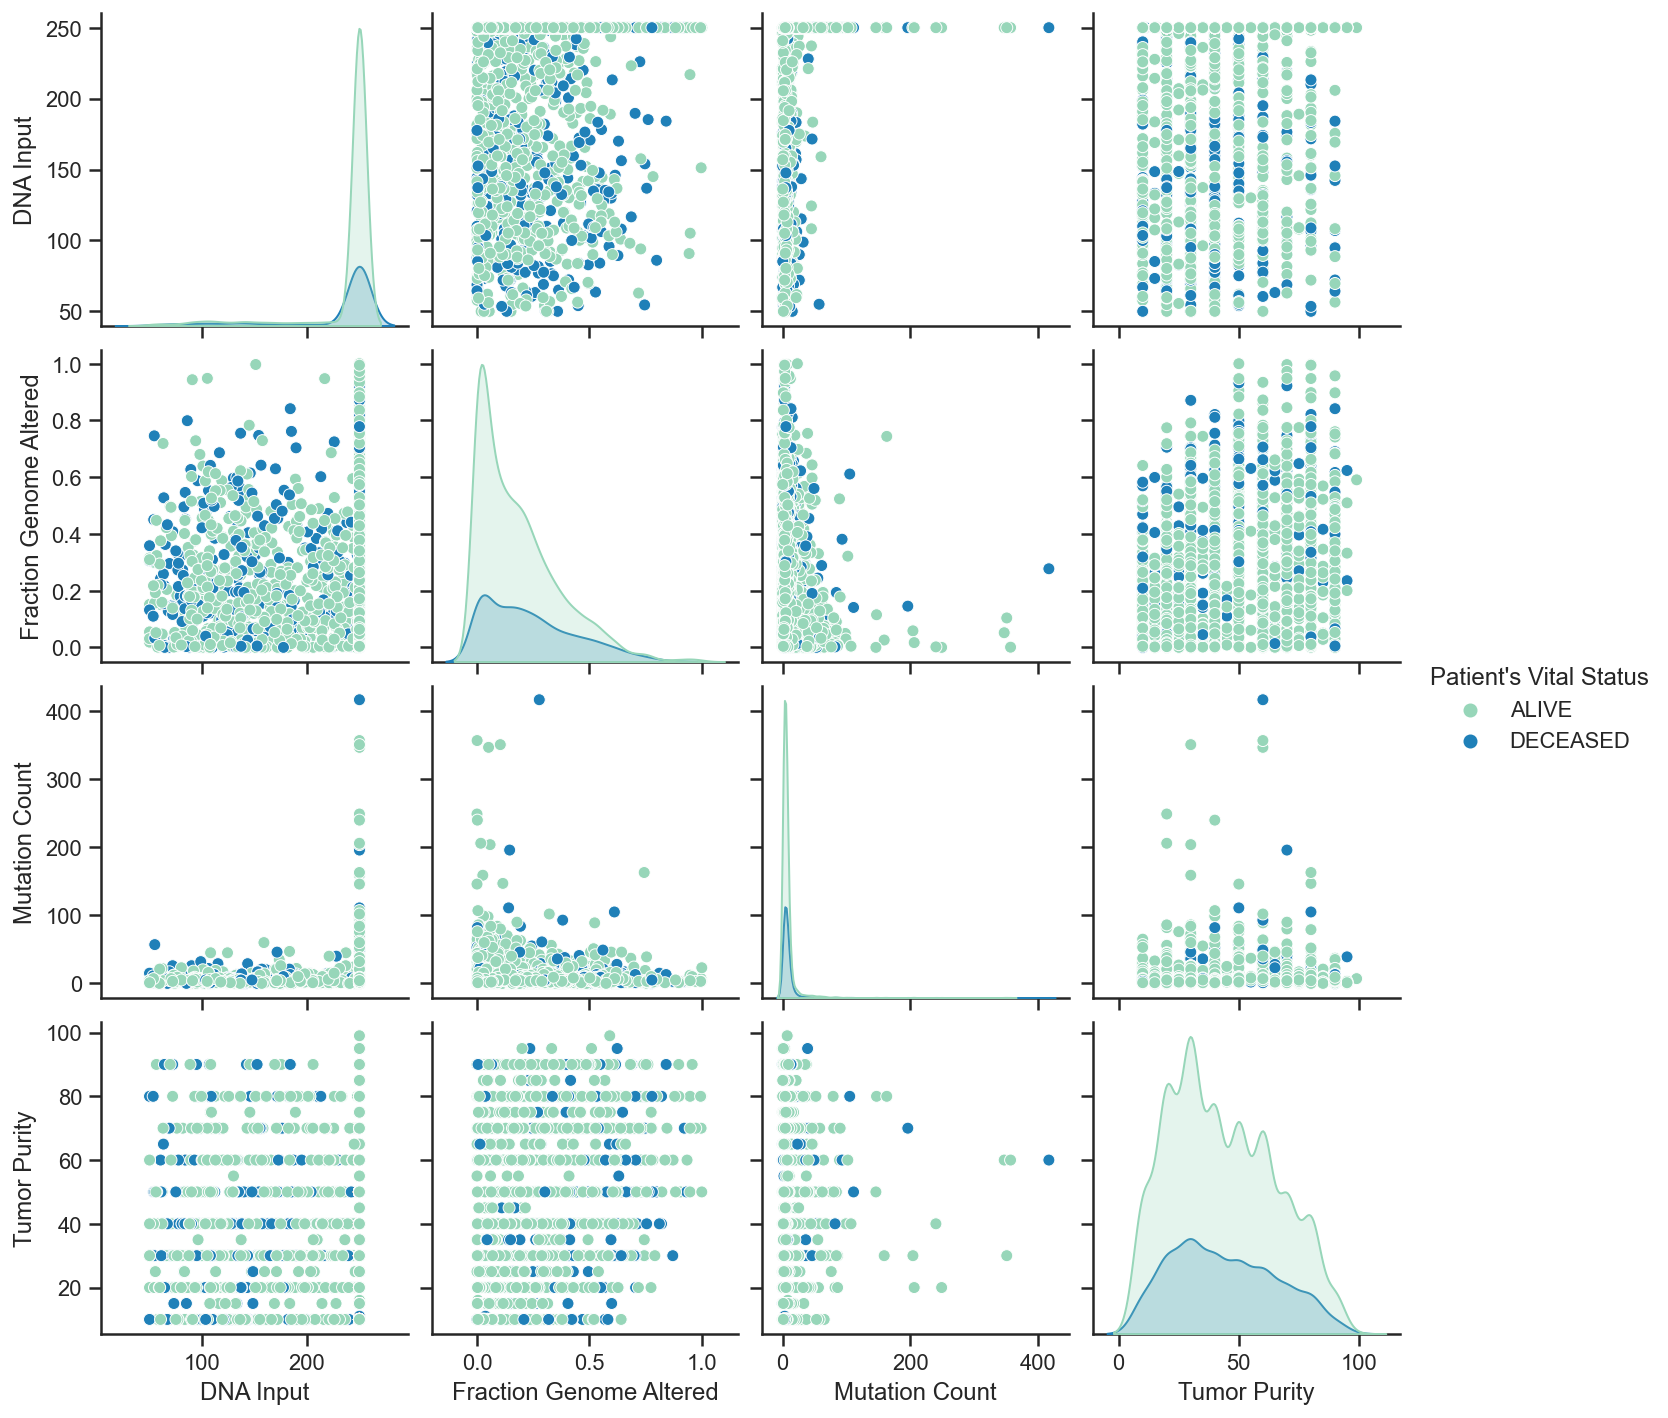

In [156]:
## numeric features distribution and correlation between numeric features
sns.pairplot(mini_df, hue = 'Patient\'s Vital Status', palette="YlGnBu")

array([[<AxesSubplot:title={'center':'DNA Input'}>,
        <AxesSubplot:title={'center':'Fraction Genome Altered'}>],
       [<AxesSubplot:title={'center':'Mutation Count'}>,
        <AxesSubplot:title={'center':'Tumor Purity'}>]], dtype=object)

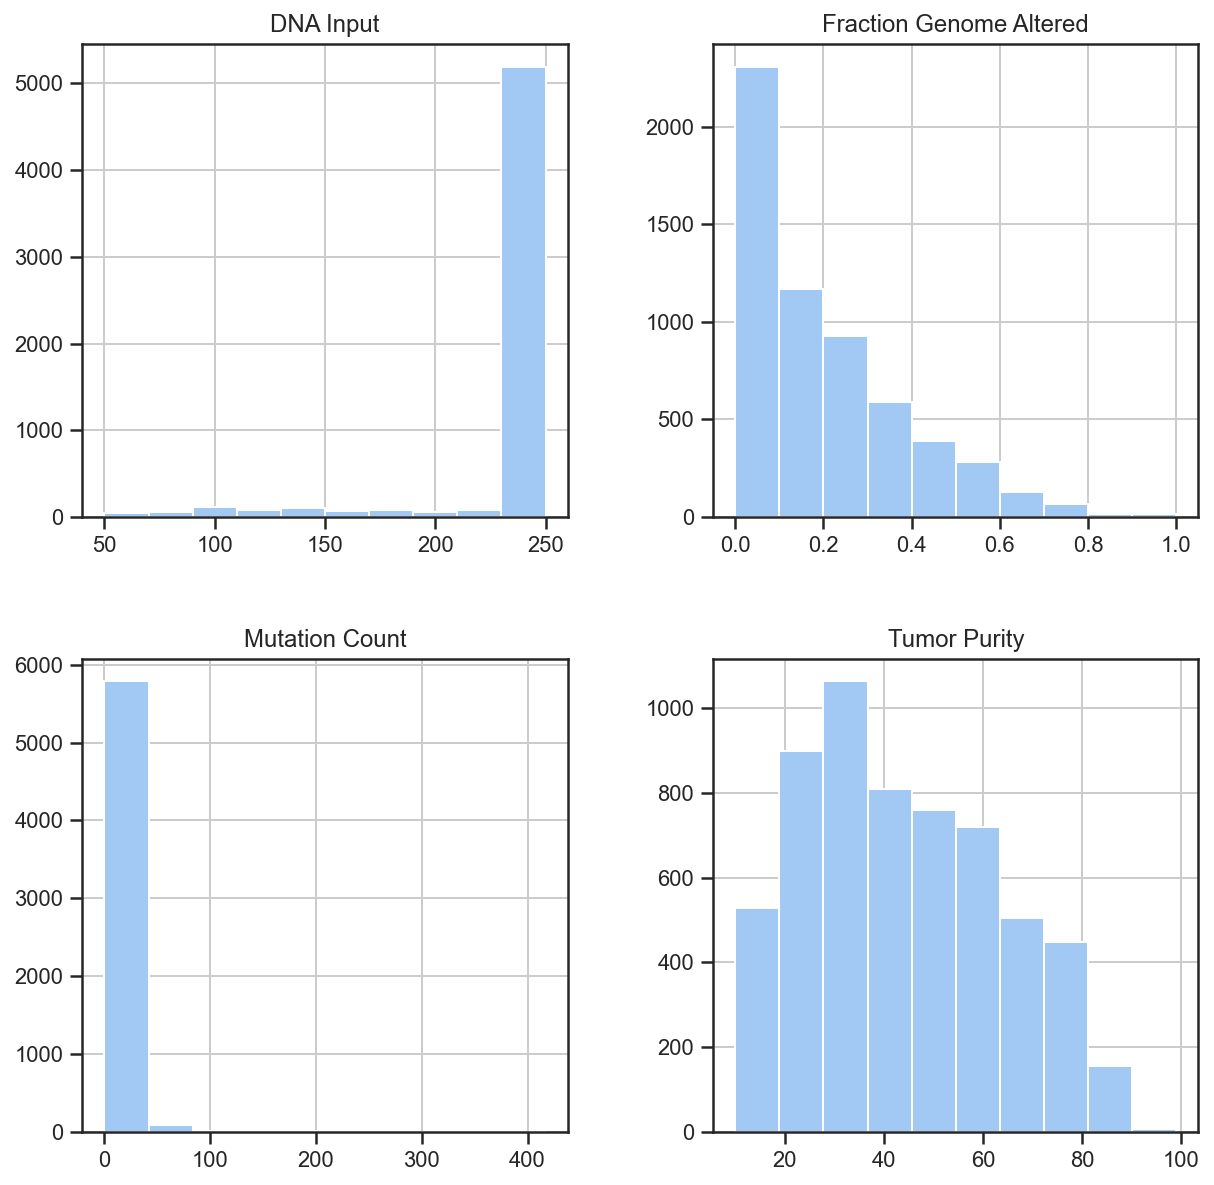

In [157]:
mini_df.hist(figsize = (10,10))

<AxesSubplot:>

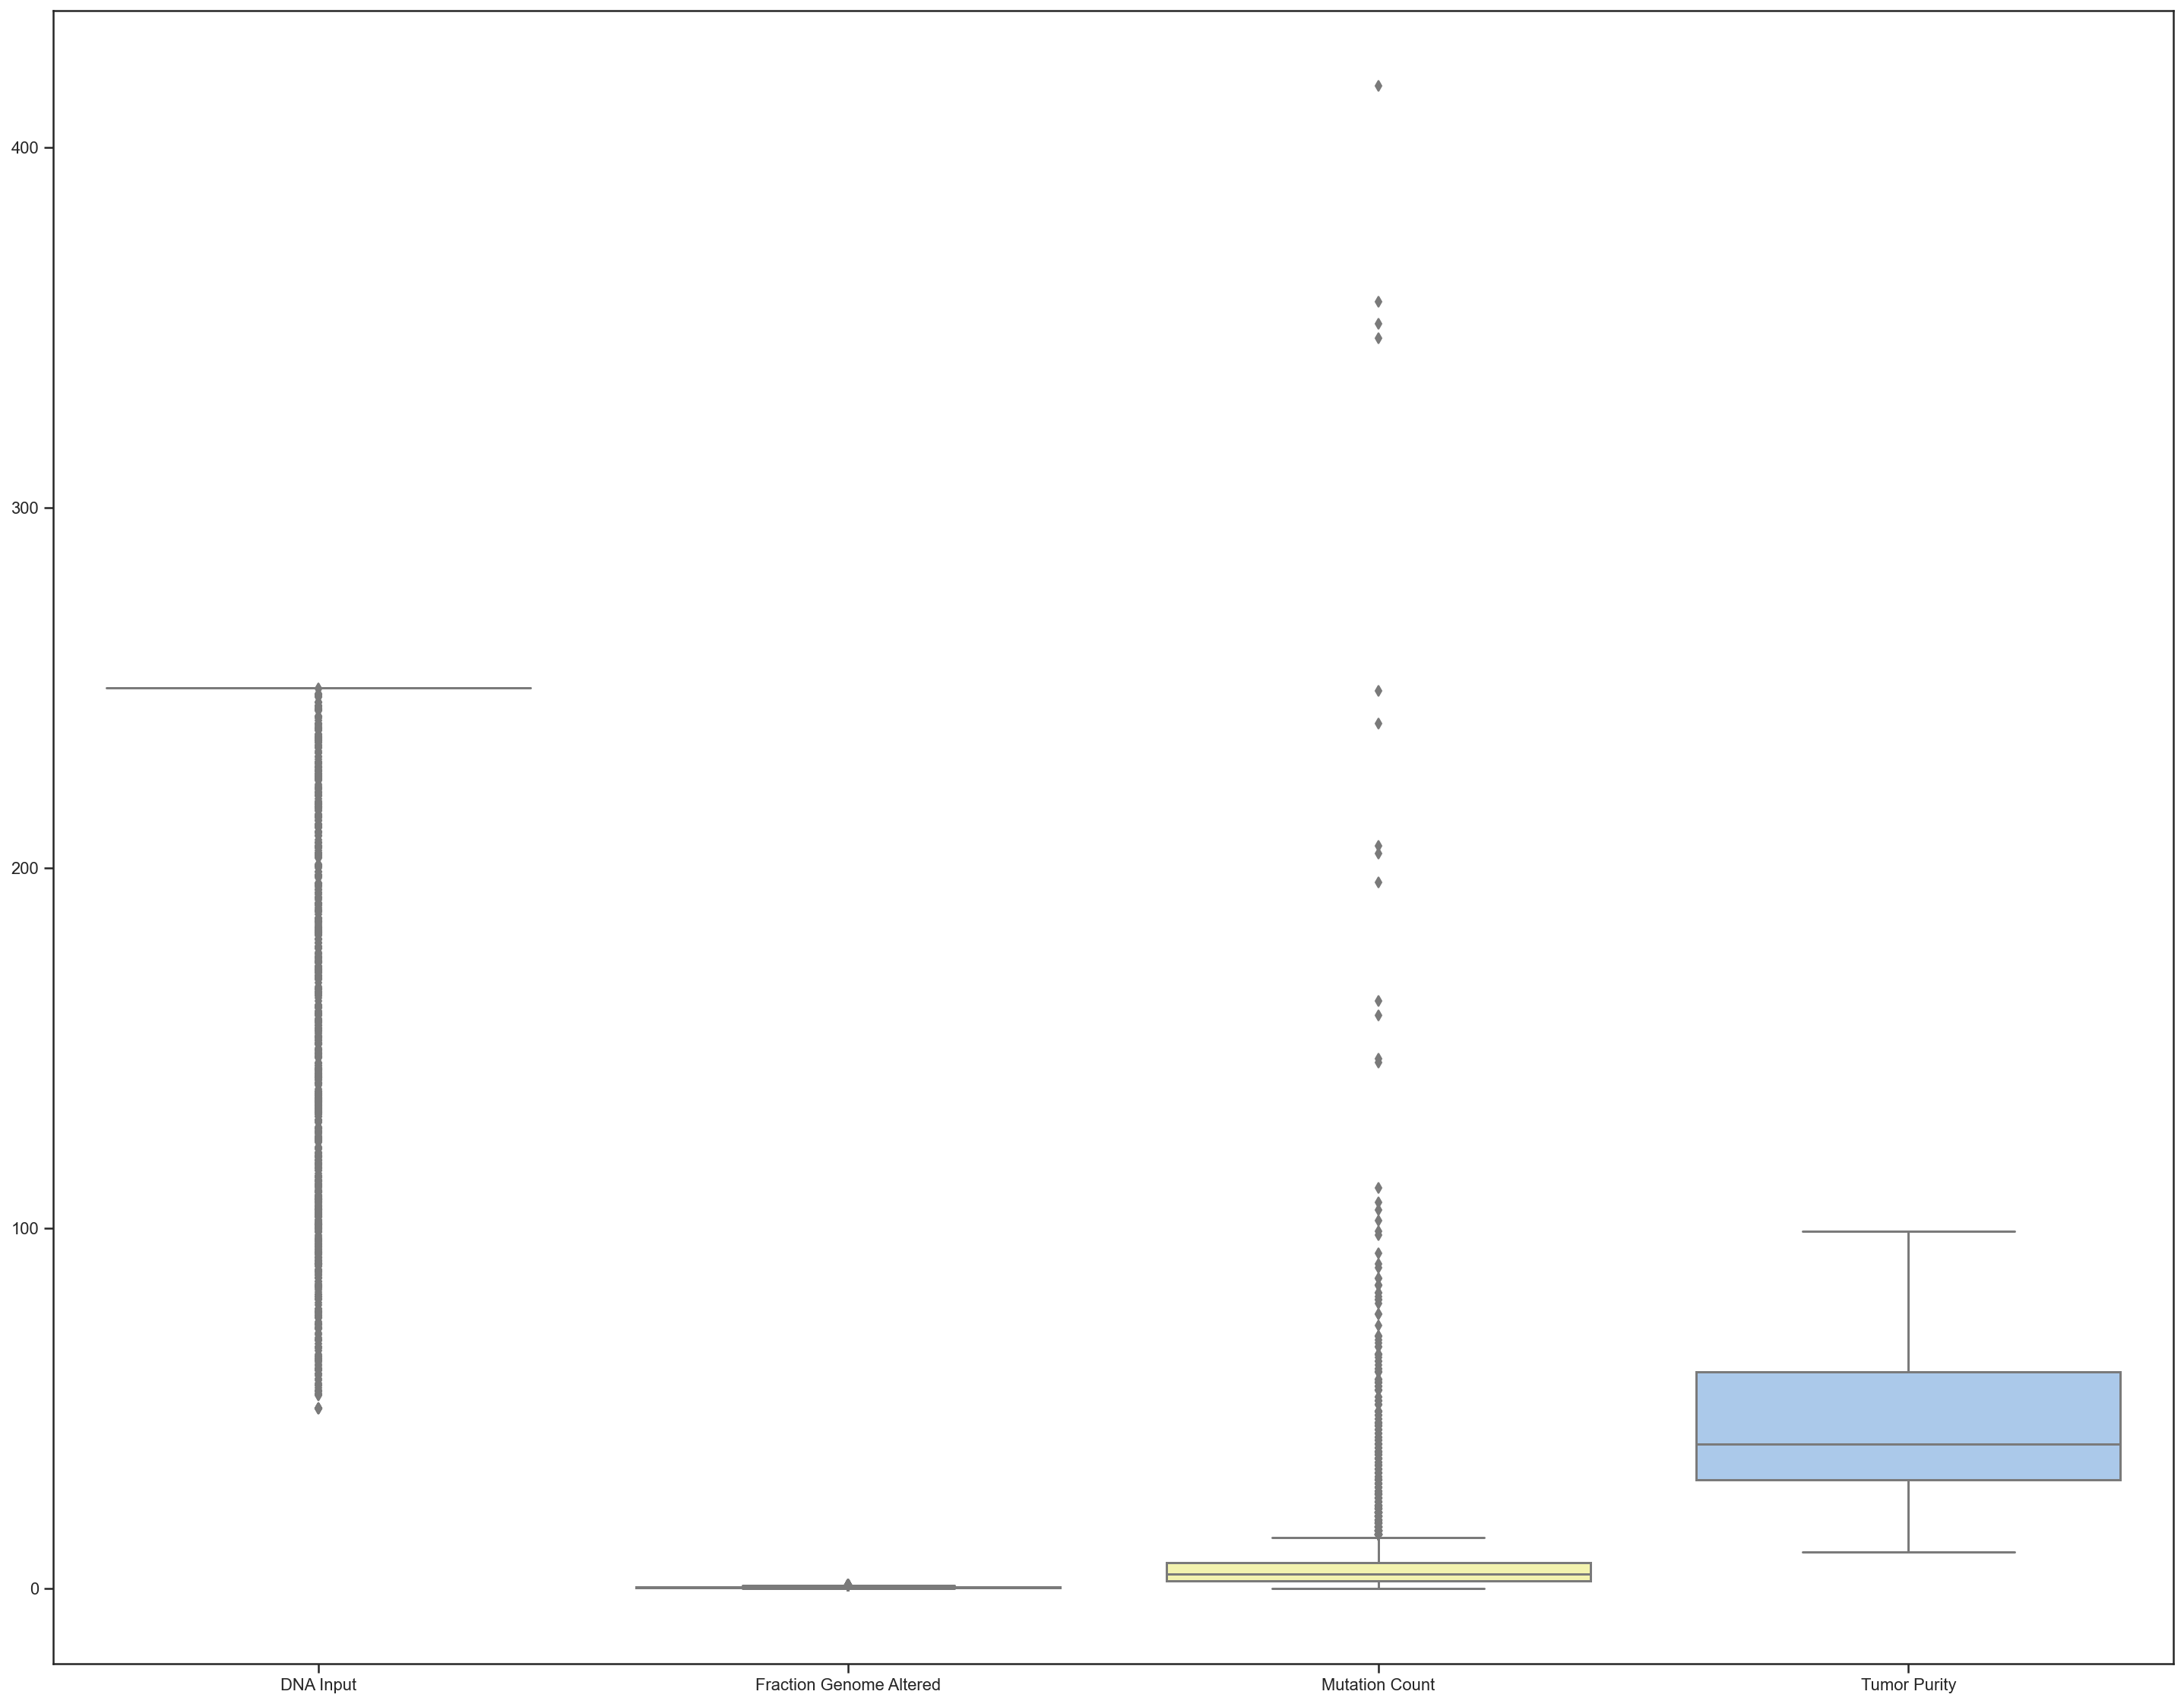

In [158]:
# ploting box plot for numeric features
sns.set_theme(style='ticks', palette='pastel', rc={'figure.figsize': (25,20)})
sns.boxplot (palette=['y','b'],data=mini_df.select_dtypes(include = np.number))

In [159]:
# description of categorical features
mini_df[mini_df.select_dtypes(include = 'object').columns].astype('category').describe().T

,count,unique,top,freq
Patient ID,5897,5565,P-0000377,5
Cancer Type,5897,7,Non-Small Cell Lung Cancer,1541
Cancer Type Detailed,5897,98,Lung Adenocarcinoma,1243
Metastatic Site,5897,103,Unknown,3333
Oncotree Code,5897,98,LUAD,1243
Primary Tumor Site,5897,81,Lung,1552
Sex,5897,2,Female,3208
Smoking History,5897,3,Never,2480
Patient's Vital Status,5897,2,ALIVE,4365


<AxesSubplot:>

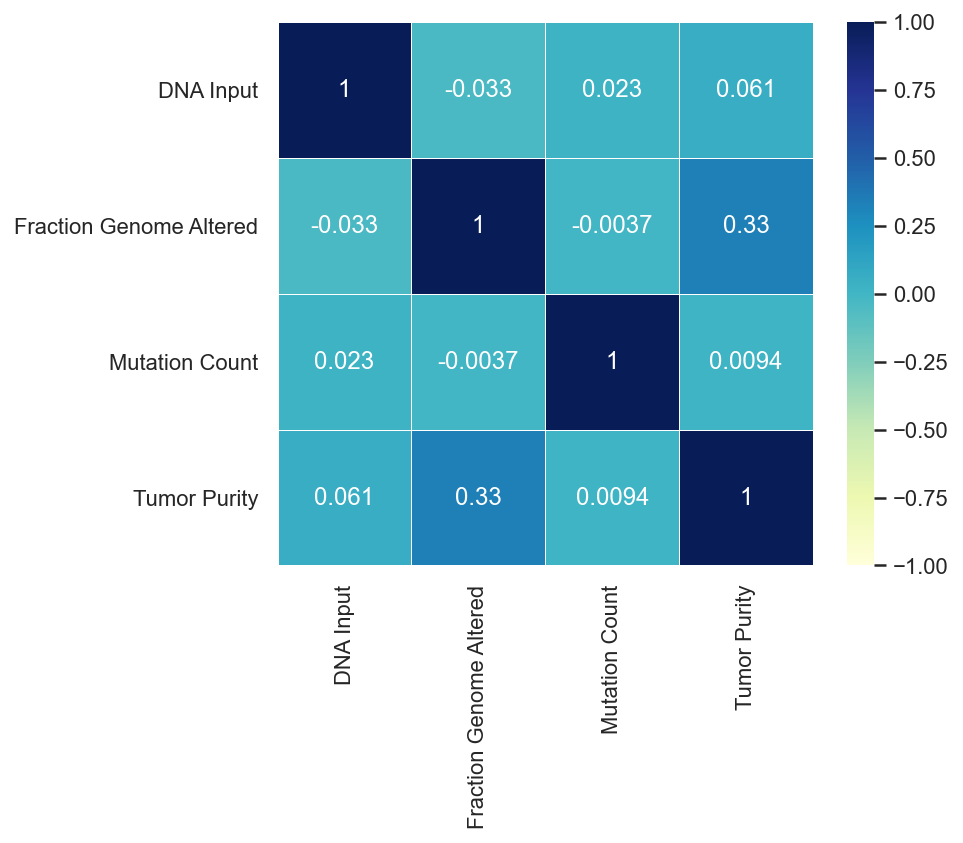

In [161]:
## plot a correlation heatmap of the numerical features 
sns.set_theme(rc={'figure.figsize': (6,5)})
sns.heatmap(mini_df.select_dtypes(include = np.number).corr(), vmin=-1,vmax=1, annot = True, linewidths=.5, 
                cmap = "YlGnBu")

In [162]:
# create a pie chart to visualize the percentage of survival status 
fig = px.pie(mini_df, values=df['Patient\'s Vital Status'].value_counts(), 
             names=mini_df['Patient\'s Vital Status'].unique(), title='Survival Status Percentage')
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker=dict(colors=['powderblue', 'gold'], line=dict(color='#000000', width=1)),opacity = 0.8)
fig.show()

In [164]:
# select the highest 7 top cancer type and replace the rest with other 
df_types = pd.DataFrame(mini_df['Cancer Type'].value_counts()).reset_index()
df_types.columns = ['type','count']

In [165]:
# visualize the percentage of the top 7 cancer types
fig = px.pie(df_types, values='count', names='type', title='Cancer Type')
fig.update_traces(textposition='inside', textinfo='percent+label',
                 marker=dict(colors=['darkblue','cornflowerblue', 'lightskyblue','powderblue','cornsilk',
                                     'gold','yellowgreen','seagreen'], line=dict(color='#000000', width=1)),opacity = 0.8)
fig.show()

In [166]:
# study the effect of cancer type on the survival status 
table =  (pd.crosstab(mini_df['Patient\'s Vital Status'], mini_df['Cancer Type'], normalize= 'all') * 100).round(2)

In [167]:
# rename the columns to shorten them
table.columns = ['Breast','Colorectal'
        ,'Glioma','Non-Small Cell Lung','Pancreatic','Prostate','Soft Tissue Sarcoma']

In [168]:
table

,Breast,Colorectal,Glioma,Non-Small Cell Lung,Pancreatic,Prostate,Soft Tissue Sarcoma
Patient's Vital Status,,,,,,,
ALIVE,16.06,12.51,6.68,17.69,6.12,9.77,5.19
DECEASED,5.60,3.43,2.37,8.44,2.19,2.17,1.78


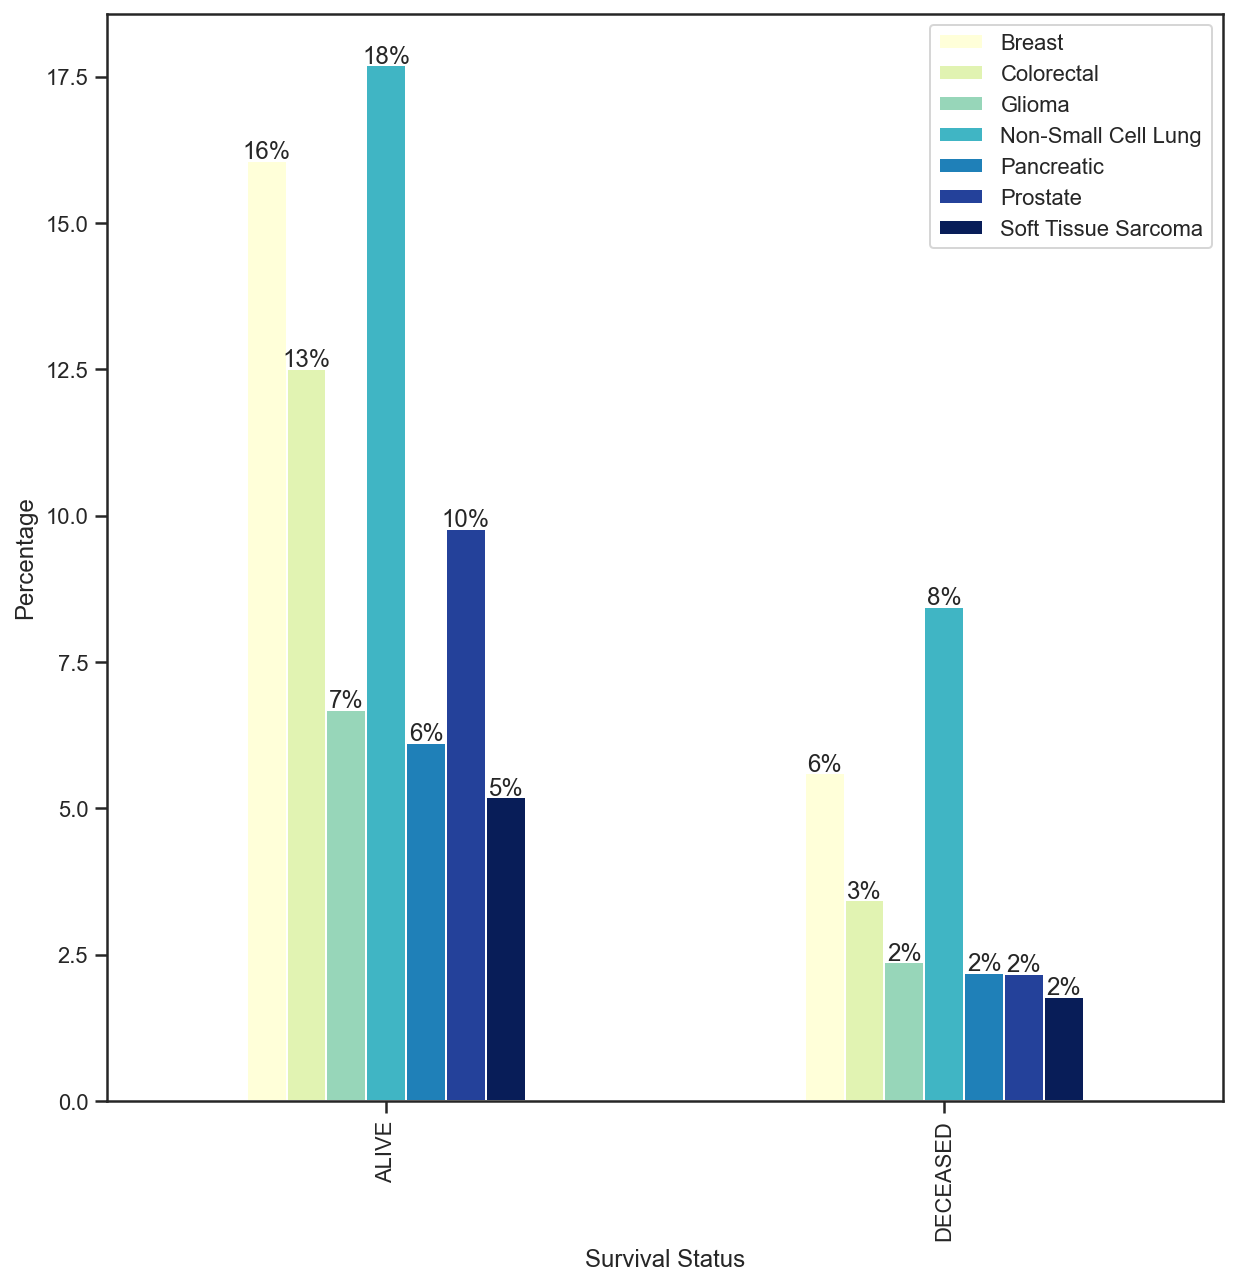

In [171]:
# visualize the effect of cancer type on survival rate
ax = table.plot.bar(colormap = 'YlGnBu')
ax.set_xlabel('Survival Status')
ax.set_ylabel('Percentage')
#position the legened box outside the plot box
ax.legend(bbox_to_anchor=(1.0, 1.0))
#annotate the grouped bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height+0.15,'{:.0f}%'.format(height),horizontalalignment='center', verticalalignment='center')  
sns.set_theme(style='ticks', palette='pastel', rc={'figure.figsize': (10,10)})
plt.show()

In [172]:
# study the effect of cancer type on the survival status 
table =  (pd.crosstab(mini_df['Patient\'s Vital Status'], mini_df['Smoking History'], normalize= 'all') * 100).round(2)
table

Smoking History,Never,Prev/Curr Smoker,Unknown
Patient's Vital Status,,,
ALIVE,31.34,28.71,13.97
DECEASED,10.72,11.94,3.32


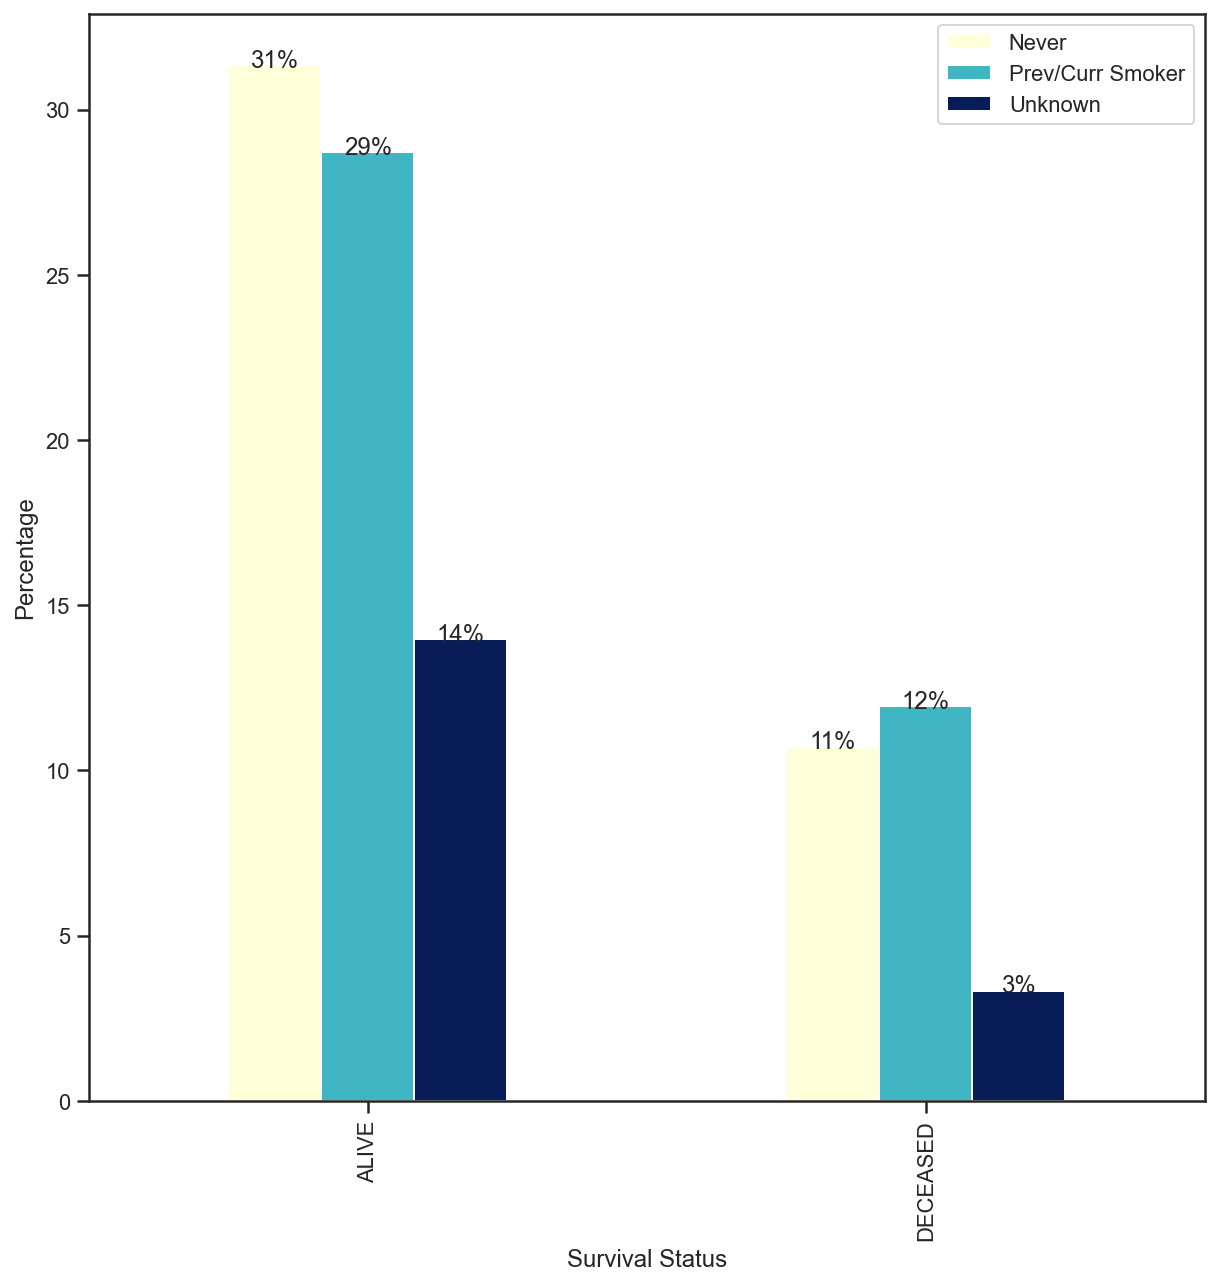

<Figure size 720x720 with 0 Axes>

In [173]:
# visualize the effect of cancer type on survival rate
ax = table.plot.bar(colormap = 'YlGnBu')
ax.set_xlabel('Survival Status')
ax.set_ylabel('Percentage')
#position the legened box outside the plot box
ax.legend(bbox_to_anchor=(1.0, 1.0))
#annotate the grouped bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height+0.15,'{:.0f}%'.format(height),horizontalalignment='center', verticalalignment='center')  
sns.set_theme(style='ticks', palette='pastel', rc={'figure.figsize': (10,10)})
plt.show()
plt.savefig('smoking.png')

## Predection

In [2]:
# import prediction libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix
from pycaret.classification import *

In [26]:
# split the dataset into test and train in a way that the same patient will be in either train or test set
np.random.seed(42)

total_patients = mini_df['Patient ID'].unique() 
test_patients = np.random.choice(total_patients, size=int(total_patients.shape[0] * .20))

# get transfer categorical features into 0 and 1
dummy_df = pd.get_dummies(mini_df.drop(['Patient ID', 'Patient\'s Vital Status'],axis=1))
dummy_df['Patient ID'] = mini_df['Patient ID']
dummy_df['target'] = mini_df['Patient\'s Vital Status']
dummy_df['target'] = dummy_df['target'].apply(lambda x: 1 if x == 'ALIVE' else 0 )

# split into train and test
X_train = dummy_df[~dummy_df['Patient ID'].isin(test_patients)]
X_test = dummy_df[dummy_df['Patient ID'].isin(test_patients)]

# assin target columns
y_train = X_train['target']
y_test = X_test['target']

X_train = X_train.drop(['target', 'Patient ID'],axis=1)
X_test = X_test.drop(['target', 'Patient ID'],axis=1)

In [27]:
# apply features scaling 

df_columns = X_train.columns
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = df_columns)

X_test = pd.DataFrame(sc.transform(X_test), columns = df_columns)

In [28]:
# compare models performance using PyCaret
grid = setup(data = dummy_df.drop('Patient ID', axis = 1), target = 'target', session_id=42)
best_model = compare_models()
print(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7449,0.6613,0.9645,0.7565,0.8479,0.1227,0.1711,1.6270
ridge,Ridge Classifier,0.7393,0.0000,0.9606,0.7536,0.8445,0.1039,0.1444,0.0240
gbc,Gradient Boosting Classifier,0.7383,0.6522,0.9737,0.7477,0.8458,0.0702,0.1165,0.1950
lda,Linear Discriminant Analysis,0.7359,0.6552,0.9362,0.7608,0.8394,0.1376,0.1653,0.0820
ada,Ada Boost Classifier,0.7356,0.6548,0.9514,0.7543,0.8414,0.1063,0.1401,0.0780
lightgbm,Light Gradient Boosting Machine,0.7201,0.6268,0.9205,0.7542,0.8290,0.0975,0.1150,0.1150
rf,Random Forest Classifier,0.7163,0.6254,0.9083,0.7560,0.8251,0.1043,0.1185,0.1930
et,Extra Trees Classifier,0.7010,0.6160,0.8620,0.7632,0.8095,0.1254,0.1309,0.2580
knn,K Neighbors Classifier,0.6949,0.5353,0.8893,0.7459,0.8112,0.0467,0.0521,0.1880
svm,SVM - Linear Kernel,0.6389,0.0000,0.7809,0.5943,0.6746,0.0272,0.0504,0.1090


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [46]:
# get the optimzed hyperprameter for the logistic regressiion model
best = tune_model(LogisticRegression(), n_iter=200, choose_better=True)
print(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7168,0.6336,0.9563,0.7322,0.8293,0.0772,0.1109
1,0.7237,0.6861,0.9639,0.7348,0.8339,0.0942,0.1390
2,0.7045,0.6365,0.9487,0.7253,0.8221,0.0352,0.0510
3,0.7059,0.6225,0.9506,0.7257,0.8230,0.0378,0.0552
4,0.7497,0.6844,0.9791,0.7500,0.8494,0.1794,0.2592
5,0.7205,0.6402,0.9544,0.7361,0.8311,0.0940,0.1304
6,0.7233,0.6758,0.9639,0.7348,0.8339,0.0886,0.1318
7,0.7329,0.6678,0.9658,0.7416,0.8390,0.1289,0.1831
8,0.7370,0.6683,0.9772,0.7406,0.8426,0.1268,0.1965
9,0.7315,0.6424,0.9658,0.7405,0.8383,0.1227,0.1758


LogisticRegression(C=0.53, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [128]:
# logistic regression model with the optimaized hyper pramaters
logreg = LogisticRegression(C=0.099, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
# train the model
logreg.fit(X_train, y_train) #train
y_pred = logreg.predict(X_test) #test

Acurrecy:  0.7578849721706865
F1 Score:  0.856198347107438


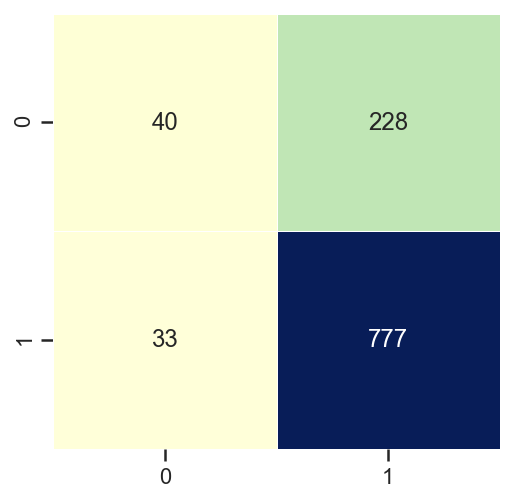

In [130]:
# model performance metrics 
print('Train score: ', logreg.score(X_train,y_train))
cm = confusion_matrix(y_test, y_pred) 
sns.set_theme(style='ticks', palette='pastel', rc={'figure.figsize': (4,4)})
sns.heatmap(cm, annot = True, linewidths=.5, cmap = "YlGnBu", fmt='g',cbar=False) 
print('Acurrecy: ', accuracy_score(y_test, y_pred))
print ('F1 Score: ', f1_score(y_test, y_pred))
plot_confusion_matrix(logreg,y_test, y_pred)
plt.show()

In [112]:
best = tune_model(GradientBoostingClassifier(), n_iter=200, choose_better=True)
print(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7346,0.6764,0.9772,0.7385,0.8412,0.1197,0.1881
1,0.7237,0.6978,0.9639,0.7348,0.8339,0.0942,0.1390
2,0.7127,0.6577,0.9582,0.7283,0.8276,0.0546,0.0822
3,0.7168,0.6465,0.9620,0.7302,0.8302,0.0662,0.1007
4,0.7401,0.6997,0.9829,0.7411,0.8450,0.1290,0.2097
5,0.7260,0.6468,0.9658,0.7362,0.8355,0.0977,0.1452
6,0.7164,0.6801,0.9620,0.7302,0.8302,0.0605,0.0927
7,0.7301,0.6852,0.9772,0.7353,0.8392,0.0950,0.1565
8,0.7370,0.7005,0.9772,0.7406,0.8426,0.1268,0.1965
9,0.7370,0.6612,0.9829,0.7386,0.8434,0.1162,0.1940


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=6,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=270,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [116]:
gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=6,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=270,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Acurrecy:  0.764378478664193
F1 Score:  0.863146551724138
Test score:  0.7601162066818842


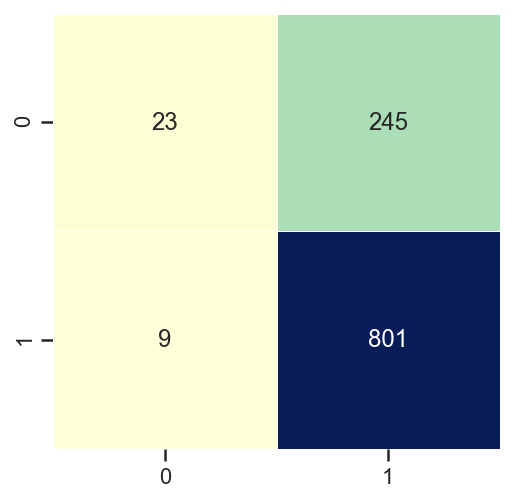

In [131]:
gbc.fit(X_train, y_train) #train
print('Train score: ', gbc.score(X_train,y_train))
y_pred = gbc.predict(X_test) #test
cm = confusion_matrix(y_test, y_pred) 
sns.set_theme(style='ticks', palette='pastel', rc={'figure.figsize': (4,4)})
sns.heatmap(cm, annot = True, linewidths=.5, cmap = "YlGnBu", fmt='g',cbar=False) 
print('Acurrecy: ', accuracy_score(y_test, y_pred))
print ('F1 Score: ', f1_score(y_test, y_pred))